In [1]:
%load_ext autoreload
%autoreload 2

import h5py

import numpy as np
import pandas as pd
import pickle

from scipy.ndimage import gaussian_filter1d
from matplotlib import pyplot as plt
from matplotlib.cm import gist_rainbow
from matplotlib.colors import Normalize, TwoSlopeNorm

from tqdm import tqdm

import os
import sys
sys.path.insert(1, '../')

from utils.viz import *
from utils.inference import load_inference_results
from utils.weighted_acc_rmse import unlog_tp, weighted_acc, weighted_rmse

cfs_dir = '/global/cfs/cdirs/dasrepo/jpduncan/weatherbenching/ERA5_generative'
scratch_dir = '/pscratch/sd/j/jpduncan/weatherbenching/ERA5_generative/inference'

configs = {
    'inf_l1_only_afno_wind': {
        'control': os.path.join(cfs_dir, 'inf_l1_only_afno_wind/inference_ensemble/control/ens_autoregressive_predictions_control_tp_ckpt_best.h5'),
        'ens100': os.path.join(cfs_dir, 'inf_l1_only_afno_wind/inference_ensemble/ens100/rollout_ckpt_best_level0.1.h5'),
    },
    'inf_l1_only_afno_wind_ppad_precip': {
        'control': os.path.join(cfs_dir, 'inf_l1_only_afno_wind_ppad_precip/inference_ensemble/control/rollout_ckpt_best.h5'),
        # 'ens100': os.path.join(cfs_dir, 'inf_l1_only_afno_wind_ppad_precip/inference_ensemble/ens100/rollout_ckpt_best_level0.1.h5'),
    },
    'inf_gan_decay_best_acc': {
        'control': os.path.join(scratch_dir, 'inf_gan_decay/inference_ensemble_viz/control/combined/rollout_ckpt_best.h5'),
        'ens100': os.path.join(scratch_dir, 'inf_gan_decay/inference_ensemble/ens100/combined/rollout_ckpt_best_level0.0.h5'),
    },
    'inf_gan_decay_best_bll': {
        'control': os.path.join(cfs_dir, 'inf_gan_decay/inference_ensemble/control/ens_autoregressive_predictions_control_tp_ckpt_best_binned_log_l1.h5'),
        'ens100': os.path.join(cfs_dir, 'inf_gan_decay/inference_ensemble/ens100/rollout_ckpt_best_binned_log_l1_level0.0.h5'),
        # 'ens100': os.path.join(scratch_dir, 'inf_gan_decay/inference_ensemble/ens100/best_bll/combined/rollout_ckpt_best_binned_log_l1_level0.0.h5'),
    },
    # 'inf_gan_ppad_precip': {
    #     'control': os.path.join(scratch_dir, 'inf_gan_ppad_precip/inference_ensemble/control/combined/rollout_ckpt_best_binned_log_l1.h5'),
    # },
    'afno': {
        'control': os.path.join(cfs_dir, 'afno/inference_ensemble/control/ens_autoregressive_predictions_spectra_control_tp.h5'),
        'ens100': os.path.join(cfs_dir, 'afno/inference_ensemble/ens100/ens_autoregressive_predictions_spectra_0.1_100ens_tp.h5'),
    }
}
        
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'


In [2]:
inf_results = load_inference_results(configs, root_dir=scratch_dir)
inf_results.keys()

dict_keys(['inf_l1_only_afno_wind', 'inf_l1_only_afno_wind_ppad_precip', 'inf_gan_decay_best_acc', 'inf_gan_decay_best_bll', 'afno'])

In [3]:
inf_results['afno']['control'].filename

'/global/cfs/cdirs/dasrepo/jpduncan/weatherbenching/ERA5_generative/afno/inference_ensemble/control/ens_autoregressive_predictions_spectra_control_tp.h5'

In [4]:
inf_results['inf_l1_only_afno_wind']['control'].keys()

dict_keys(['acc', 'binned_log_l1', 'ics', 'pred_hists', 'rmse', 'seq_pred_tp', 'seq_real_tp', 'tar_hists', 'tqe'])

In [5]:
inf_results['inf_l1_only_afno_wind']['control']['seq_pred_tp']

In [6]:
type(inf_results['inf_l1_only_afno_wind']['control']['acc'])

numpy.ndarray

In [7]:
inf_results['inf_l1_only_afno_wind']['control']['acc'].shape

(178, 41, 1)

In [8]:
inf_results['afno']['control'].keys()

dict_keys(['acc', 'corr_amp', 'corr_amp_by_freq', 'corr_phase', 'corr_phase_by_freq', 'err_amp_by_freq', 'fcl', 'fcl_by_freq', 'ffl', 'ffl_by_freq', 'pred_amp_by_freq', 'rmse', 'rmse_amp', 'rmse_amp_by_freq', 'rmse_phase', 'rmse_phase_by_freq', 'tar_amp_by_freq', 'tqe', 'wf_corr_amp', 'wf_corr_amp_by_freq', 'wf_corr_phase', 'wf_corr_phase_by_freq', 'wf_fcl', 'wf_fcl_by_freq', 'wf_ffl', 'wf_ffl_by_freq', 'wf_rmse_amp', 'wf_rmse_amp_by_freq', 'wf_rmse_phase', 'wf_rmse_phase_by_freq', 'wfl_corr_amp', 'wfl_corr_amp_by_freq', 'wfl_corr_phase', 'wfl_corr_phase_by_freq', 'wfl_fcl', 'wfl_fcl_by_freq', 'wfl_ffl', 'wfl_ffl_by_freq', 'wfl_rmse_amp', 'wfl_rmse_amp_by_freq', 'wfl_rmse_phase', 'wfl_rmse_phase_by_freq', 'wl_corr_amp', 'wl_corr_amp_by_freq', 'wl_corr_phase', 'wl_corr_phase_by_freq', 'wl_fcl', 'wl_fcl_by_freq', 'wl_ffl', 'wl_ffl_by_freq', 'wl_rmse_amp', 'wl_rmse_amp_by_freq', 'wl_rmse_phase', 'wl_rmse_phase_by_freq'])

In [9]:
inf_results['afno']['ens100']['acc'].shape

(178, 41, 1)

In [10]:
inf_results['inf_l1_only_afno_wind']['control']['ics'].ravel()

array([   0.,    8.,   16.,   24.,   32.,   40.,   48.,   56.,   64.,
         72.,   80.,   88.,   96.,  104.,  112.,  120.,  128.,  136.,
        144.,  152.,  160.,  168.,  176.,  184.,  192.,  200.,  208.,
        216.,  224.,  232.,  240.,  248.,  256.,  264.,  272.,  280.,
        288.,  296.,  304.,  312.,  320.,  328.,  336.,  344.,  352.,
        360.,  368.,  376.,  384.,  392.,  400.,  408.,  416.,  424.,
        432.,  440.,  448.,  456.,  464.,  472.,  480.,  488.,  496.,
        504.,  512.,  520.,  528.,  536.,  544.,  552.,  560.,  568.,
        576.,  584.,  592.,  600.,  608.,  616.,  624.,  632.,  640.,
        648.,  656.,  664.,  672.,  680.,  688.,  696.,  704.,  712.,
        720.,  728.,  736.,  744.,  752.,  760.,  768.,  776.,  784.,
        792.,  800.,  808.,  816.,  824.,  832.,  840.,  848.,  856.,
        864.,  872.,  880.,  888.,  896.,  904.,  912.,  920.,  928.,
        936.,  944.,  952.,  960.,  968.,  976.,  984.,  992., 1000.,
       1008., 1016.,

In [11]:
for config, inner_dict in inf_results.items():
    print(config)
    for exper, dset in inner_dict.items():
        msg = '--- ' + exper
        n_ics = 0
        if config != 'afno':
            n_ics = len(dset["ics"][:])
            print(f"{msg}\n{dset.filename}\nnum. ics: {n_ics}/178\n")
    print()

inf_l1_only_afno_wind
--- control
/global/cfs/cdirs/dasrepo/jpduncan/weatherbenching/ERA5_generative/inf_l1_only_afno_wind/inference_ensemble/control/ens_autoregressive_predictions_control_tp_ckpt_best.h5
num. ics: 178/178

--- ens100
/global/cfs/cdirs/dasrepo/jpduncan/weatherbenching/ERA5_generative/inf_l1_only_afno_wind/inference_ensemble/ens100/rollout_ckpt_best_level0.1.h5
num. ics: 178/178


inf_l1_only_afno_wind_ppad_precip
--- control
/global/cfs/cdirs/dasrepo/jpduncan/weatherbenching/ERA5_generative/inf_l1_only_afno_wind_ppad_precip/inference_ensemble/control/rollout_ckpt_best.h5
num. ics: 178/178


inf_gan_decay_best_acc
--- control
/pscratch/sd/j/jpduncan/weatherbenching/ERA5_generative/inference/inf_gan_decay/inference_ensemble_viz/control/combined/rollout_ckpt_best.h5
num. ics: 178/178

--- ens100
/pscratch/sd/j/jpduncan/weatherbenching/ERA5_generative/inference/inf_gan_decay/inference_ensemble/ens100/combined/rollout_ckpt_best_level0.0.h5
num. ics: 178/178


inf_gan_decay_

# Rollouts

## Control

No ensembling of model outputs.

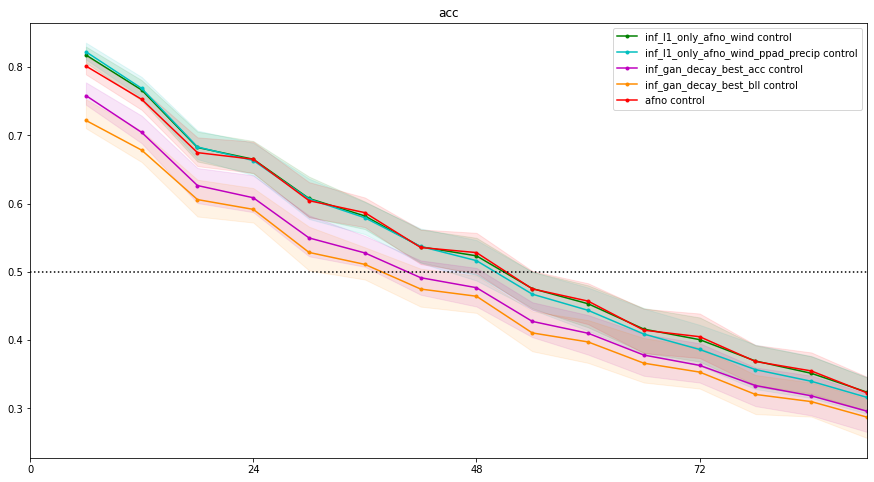

In [12]:
fc_acc = viz_inference(inf_results)
plt.hlines(0.5, 0, 15 * 6, colors='k', linestyles='dotted')
fc_acc.show()

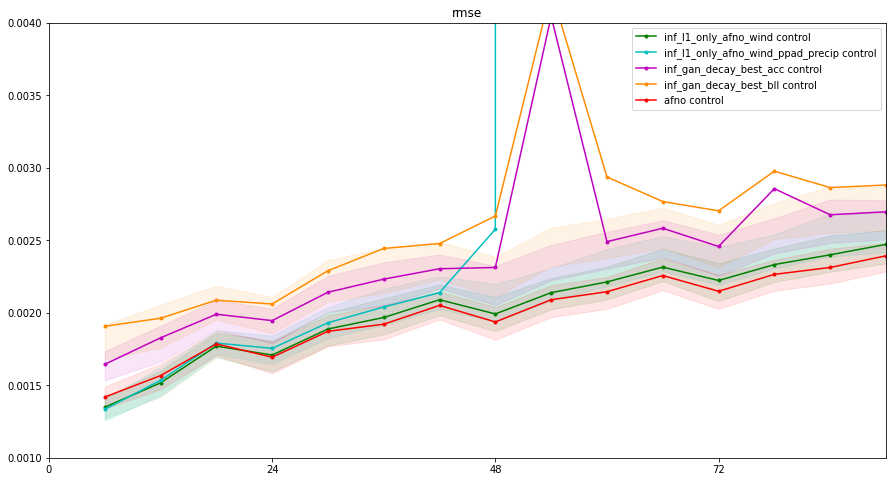

In [13]:
fc_bll = viz_inference(inf_results, metric_name='rmse')
plt.ylim(0.001, 0.004)
fc_bll.show()

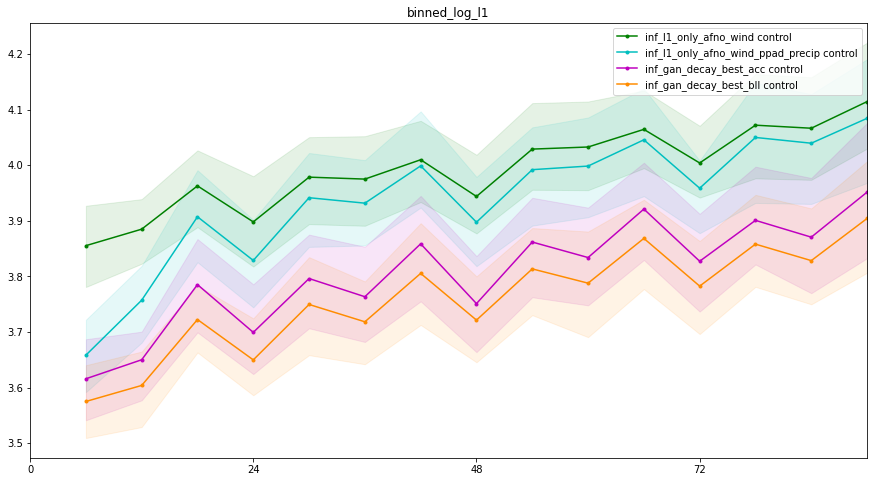

In [14]:
fc_bll = viz_inference(inf_results, metric_name='binned_log_l1')
fc_bll.show()

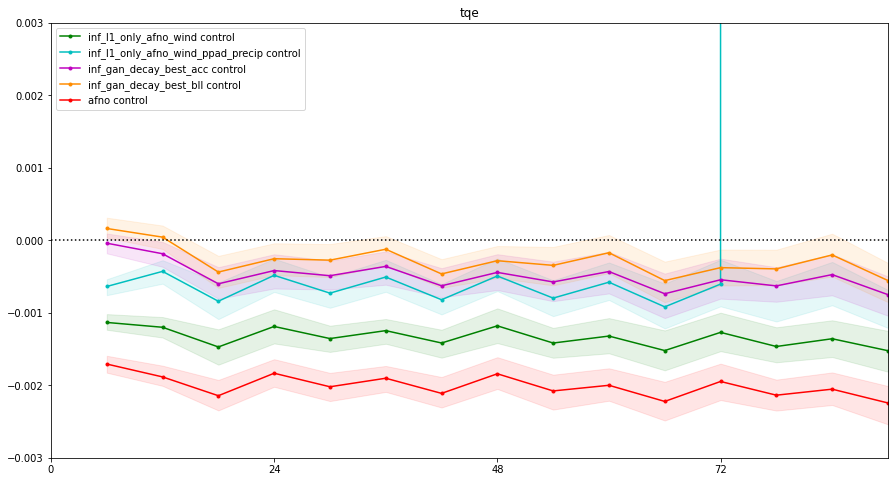

In [15]:
fc_tqe = viz_inference(inf_results, metric_name='tqe')
plt.hlines(0, 0, 15 * 6, colors='k', linestyles='dotted')
plt.ylim(-0.003, 0.003)
fc_tqe.show()

## Ensemble

Outputs are 100-member ensemble average.

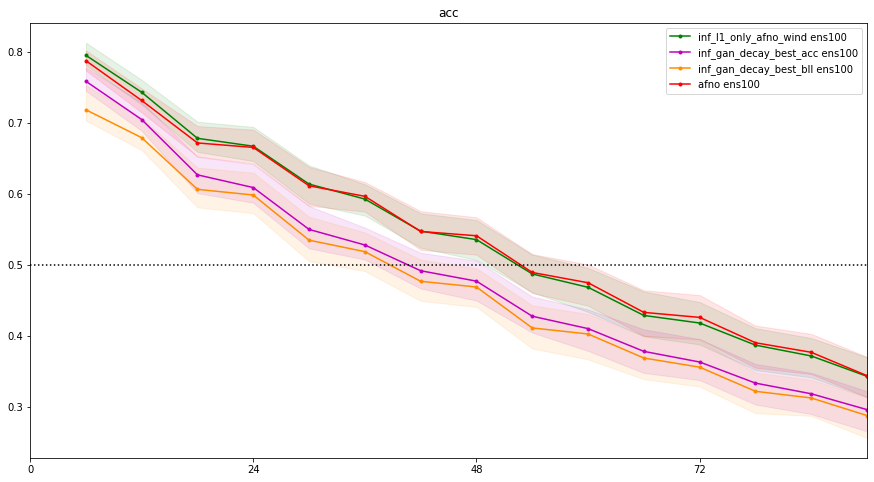

In [16]:
fe_acc = viz_inference(inf_results, ['ens100'])
plt.hlines(0.5, 0, 15 * 6, colors='k', linestyles='dotted')
fe_acc.show()

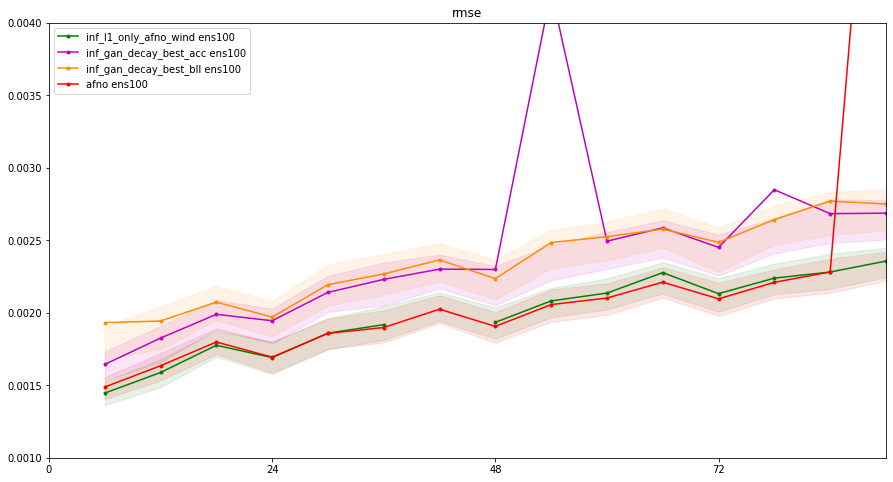

In [17]:
fe_rmse = viz_inference(inf_results, ['ens100'], metric_name='rmse')
plt.ylim(0.001, 0.004)
fe_rmse.show()

In [18]:
# fe_bll = viz_inference(inf_results, ['ens100'], metric_name='binned_log_l1')
# fe_bll.show()

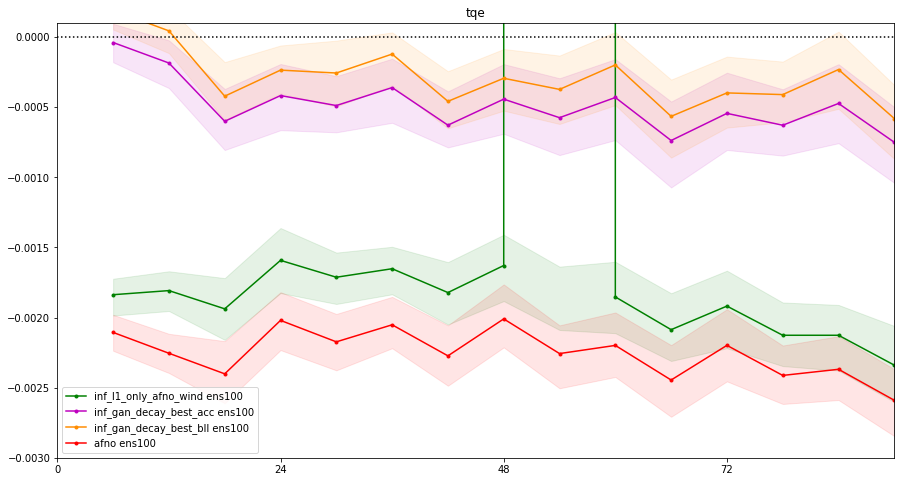

In [19]:
fe_tqe = viz_inference(inf_results, ['ens100'], metric_name='tqe')
plt.hlines(0, 0, 15 * 6, colors='k', linestyles='dotted')
plt.ylim(-0.003, 0.0001)
fe_tqe.show()

In [20]:
metrics = ['acc', 'rmse', 'binned_log_l1', 'tqe']

ens_nnan_dict = {}

for config, inner_dict in inf_results.items():
    if 'ens100' in inner_dict.keys() and config != 'afno':
        dsets = inner_dict['ens100']
        df = pd.DataFrame(columns=np.arange(41)*6, index=metrics).rename_axis('hrs ahead', axis=1)
        for metric in metrics:
            num_nan = np.isnan(dsets[metric][:]).sum(axis=0).ravel()
            df.loc[metric] = pd.Series(num_nan, index=np.arange(41)*6)
        ens_nnan_dict[config] = df
        
ens_nnan = pd.concat(ens_nnan_dict.values(), keys=ens_nnan_dict.keys())

In [21]:
ens_nnan.iloc[:, :30]

hrs ahead                            0   6   12  18  24  30  36  42  48  54   \
inf_l1_only_afno_wind  acc             0   0   0   0   0   0   0   1   1   1   
                       rmse            0   0   0   0   0   0   0   0   1   1   
                       binned_log_l1   0   0   0   0   0   0   0   0   0   0   
                       tqe             0   0   0   0   0   0   0   0   0   0   
inf_gan_decay_best_acc acc             0   0   0   0   0   0   0   0   0   0   
                       rmse            0   0   0   0   0   0   0   0   0   0   
                       binned_log_l1   0   0   0   0   0   0   0   0   0   0   
                       tqe             0   0   0   0   0   0   0   0   0   0   
inf_gan_decay_best_bll acc             0   0   0   0   0   0   0   0   0   0   
                       rmse            0   0   0   0   0   0   0   0   0   0   
                       binned_log_l1   0   0   0   0   0   0   0   0   0   0   
                       tqe             0   0   0   0   0   0   0   0   0   0   

hrs ahead                             ... 120 126 132 138 144 150 156 162 168  \
inf_l1_only_afno_wind  acc            ...   2   3   4   4   4   7   9  18  34   
                       rmse           ...   2   2   3   3   3   5   7  13  26   
                       binned_log_l1  ...   0   0   0   0   0   0   0   0   0   
                       tqe            ...   2   2   2   3   3   3   4   4   5   
inf_gan_decay_best_acc acc            ...   0   0   0   0   0   0   0   0   1   
                       rmse           ...   0   0   0   0   0   0   0   0   1   
                       binned_log_l1  ...   0   0   0   0   0   0   0   0   0   
                       tqe            ...   0   0   0   0   0   0   0   0   0   
inf_gan_decay_best_bll acc            ...   0   0   0   0   0   0   0   0   1   
                       rmse           ...   0   0   0   0   0   0   0   0   1   
                       binned_log_l1  ...   0   0   0   0   0   0   0   0   0   
                       tqe            ...   0   0   0   0   0   0   0   0   0   

hrs ahead                            174  
inf_l1_only_afno_wind  acc            51  
                       rmse           40  
                       binned_log_l1   0  
                       tqe             5  
inf_gan_decay_best_acc acc             2  
                       rmse            1  
                       binned_log_l1   0  
                       tqe             0  
inf_gan_decay_best_bll acc             1  
                       rmse            1  
                       binned_log_l1   0  
                       tqe             0  

[12 rows x 30 columns]

In [22]:
ens_nnan.iloc[:, -20:]

hrs ahead                            126 132 138 144 150 156 162 168 174 180  \
inf_l1_only_afno_wind  acc             3   4   4   4   7   9  18  34  51  63   
                       rmse            2   3   3   3   5   7  13  26  40  47   
                       binned_log_l1   0   0   0   0   0   0   0   0   0   0   
                       tqe             2   2   3   3   3   4   4   5   5  10   
inf_gan_decay_best_acc acc             0   0   0   0   0   0   0   1   2   3   
                       rmse            0   0   0   0   0   0   0   1   1   3   
                       binned_log_l1   0   0   0   0   0   0   0   0   0   0   
                       tqe             0   0   0   0   0   0   0   0   0   0   
inf_gan_decay_best_bll acc             0   0   0   0   0   0   0   1   1   2   
                       rmse            0   0   0   0   0   0   0   1   1   2   
                       binned_log_l1   0   0   0   0   0   0   0   0   0   0   
                       tqe             0   0   0   0   0   0   0   0   0   0   

hrs ahead                            186 192  198  204  210  216  222  228  \
inf_l1_only_afno_wind  acc            81  99  111  119  133  145  158  166   
                       rmse           66  83   98  109  123  139  154  162   
                       binned_log_l1   0   0    0    0    0    0    0    0   
                       tqe            26  39   47   60   77   94  106  119   
inf_gan_decay_best_acc acc             4   6   13   23   41   51   64   71   
                       rmse            4   6   12   23   40   51   64   71   
                       binned_log_l1   0   0    0    0    0    0    0    0   
                       tqe             0   0    0    0    1    2    4   11   
inf_gan_decay_best_bll acc             2   4    9   16   25   31   38   43   
                       rmse            2   4    9   15   24   30   38   43   
                       binned_log_l1   0   0    0    0    0    0    0    0   
                       tqe             0   0    1    1    1    0    2    5   

hrs ahead                             234  240  
inf_l1_only_afno_wind  acc            175  176  
                       rmse           172  175  
                       binned_log_l1    0    0  
                       tqe            135  147  
inf_gan_decay_best_acc acc             81   97  
                       rmse            78   96  
                       binned_log_l1    0    0  
                       tqe             14   23  
inf_gan_decay_best_bll acc             48   58  
                       rmse            46   57  
                       binned_log_l1    0    0  
                       tqe             10   13

In [23]:
print(f'inf_l1_only_afno_wind, t={9*6}\n')

print(' tqe')
print(f" -- ics 0 to {int(inf_results['inf_l1_only_afno_wind']['ens100']['ics'][25])} (mean): "
      f"{inf_results['inf_l1_only_afno_wind']['ens100']['tqe'][:25, 9].mean():.4f}")
print(f" -- ic {int(inf_results['inf_l1_only_afno_wind']['ens100']['ics'][26])}: "
      f"{inf_results['inf_l1_only_afno_wind']['ens100']['tqe'][26, 9].item()}\n")

print(' binned_log_l1')
print(f" -- ics 0 to {int(inf_results['inf_l1_only_afno_wind']['ens100']['ics'][25])} (mean): "
      f"{inf_results['inf_l1_only_afno_wind']['ens100']['binned_log_l1'][:25, 9].mean():.4f}")
print(f" -- ic {int(inf_results['inf_l1_only_afno_wind']['ens100']['ics'][26])}: "
      f"{inf_results['inf_l1_only_afno_wind']['ens100']['binned_log_l1'][26, 9].item()}\n")

print(' acc')
print(f" -- ics 0 to {int(inf_results['inf_l1_only_afno_wind']['ens100']['ics'][25])} (mean): "
      f"{inf_results['inf_l1_only_afno_wind']['ens100']['acc'][:25, 9].mean():.4f}")
print(f" -- ic {int(inf_results['inf_l1_only_afno_wind']['ens100']['ics'][26])}: "
      f"{inf_results['inf_l1_only_afno_wind']['ens100']['acc'][26, 9].item()}\n")

print(' rmse')
print(f" -- ics 0 to {int(inf_results['inf_l1_only_afno_wind']['ens100']['ics'][25])} (mean): "
      f"{inf_results['inf_l1_only_afno_wind']['ens100']['rmse'][:25, 9].mean():.4f}")
print(f" -- ic {int(inf_results['inf_l1_only_afno_wind']['ens100']['ics'][26])}: "
      f"{inf_results['inf_l1_only_afno_wind']['ens100']['rmse'][26, 9].item()}")

inf_l1_only_afno_wind, t=54

 tqe
 -- ics 0 to 200 (mean): -0.0018
 -- ic 208: 124222584.0

 binned_log_l1
 -- ics 0 to 200 (mean): 4.1587
 -- ic 208: 4.3495988845825195

 acc
 -- ics 0 to 200 (mean): 0.5023
 -- ic 208: nan

 rmse
 -- ics 0 to 200 (mean): 0.0021
 -- ic 208: nan


## Compare ensemble to control

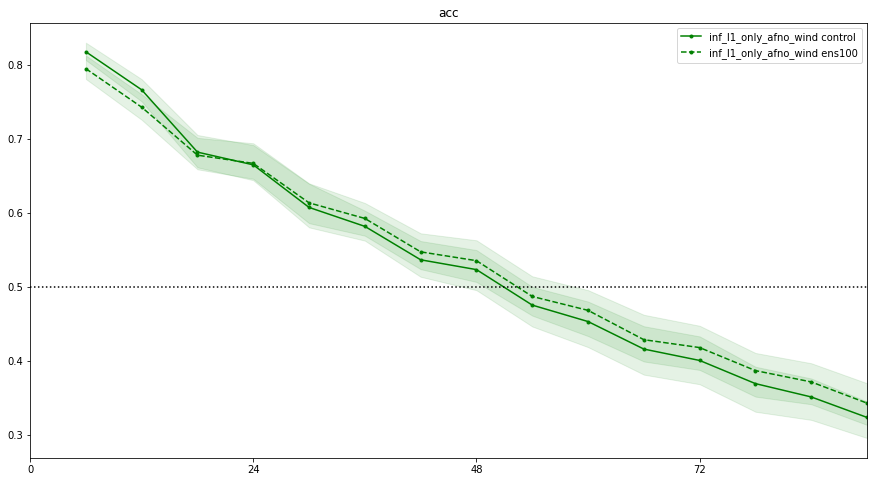

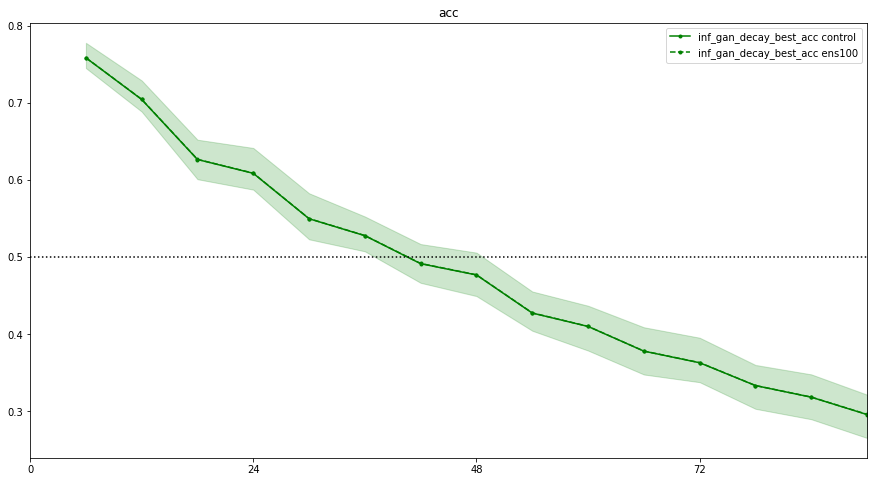

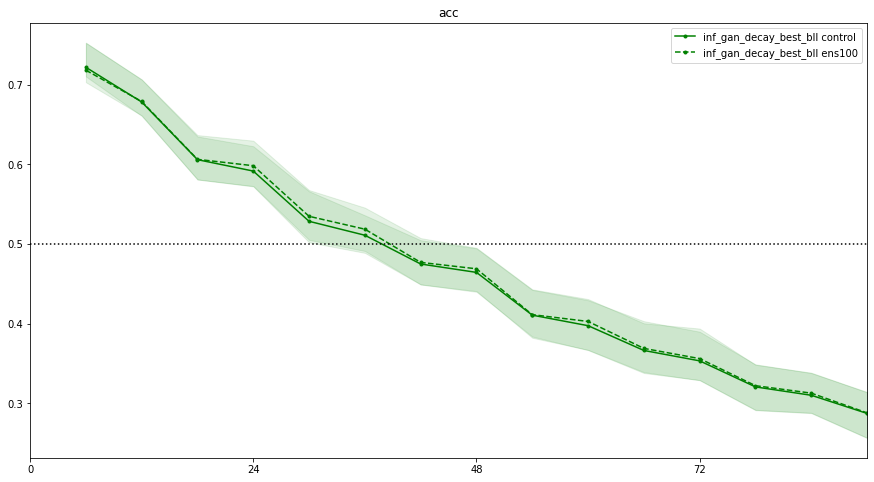

In [24]:
keys = ['inf_l1_only_afno_wind', 'inf_gan_decay_best_acc', 'inf_gan_decay_best_bll']
for key in keys:
    f = viz_inference({key: inf_results[key]}, ['control', 'ens100'], metric_name='acc')
    plt.hlines(0.5, 0, 15 * 6, colors='k', linestyles='dotted')
    f.show()

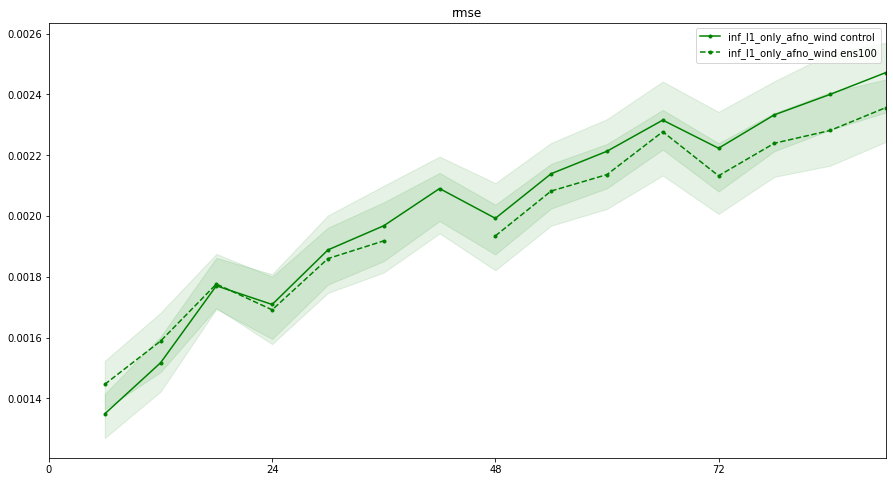

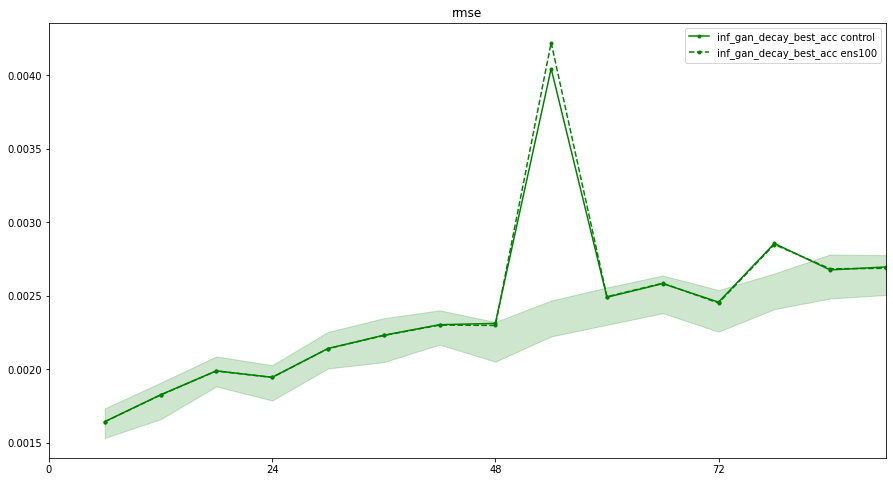

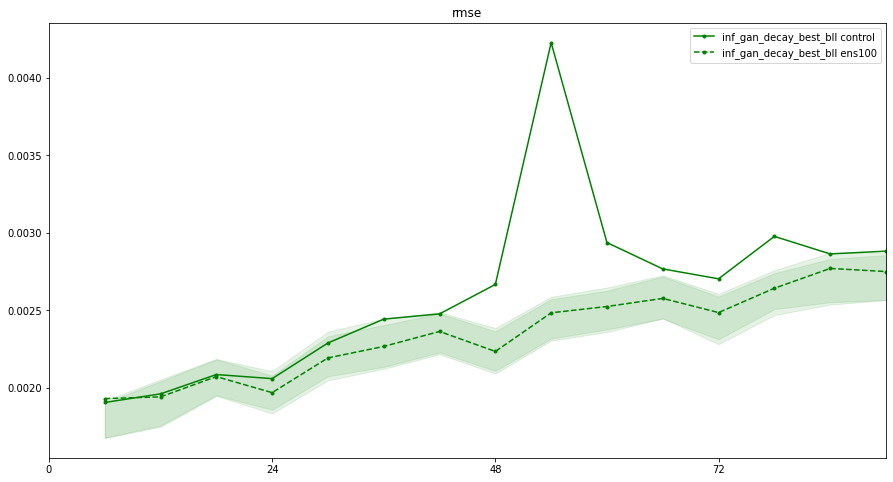

In [25]:
for key in keys:
    f = viz_inference({key: inf_results[key]}, ['control', 'ens100'], metric_name='rmse')
    f.show()

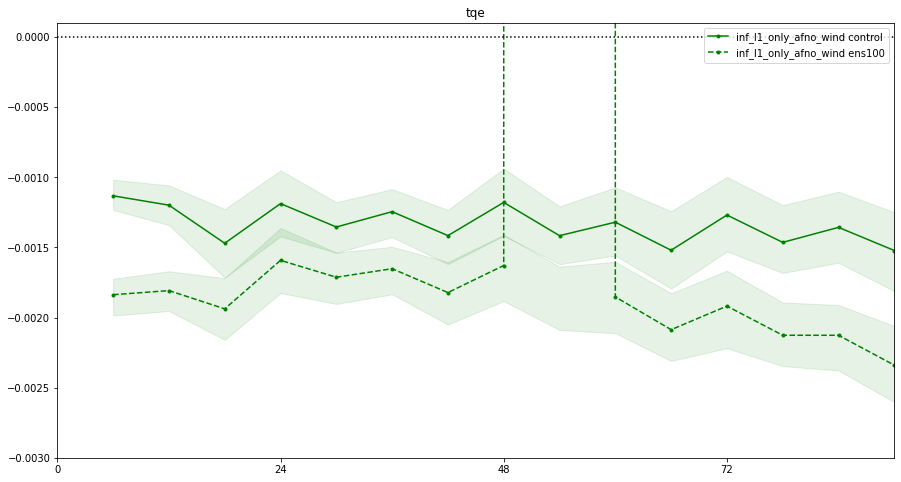

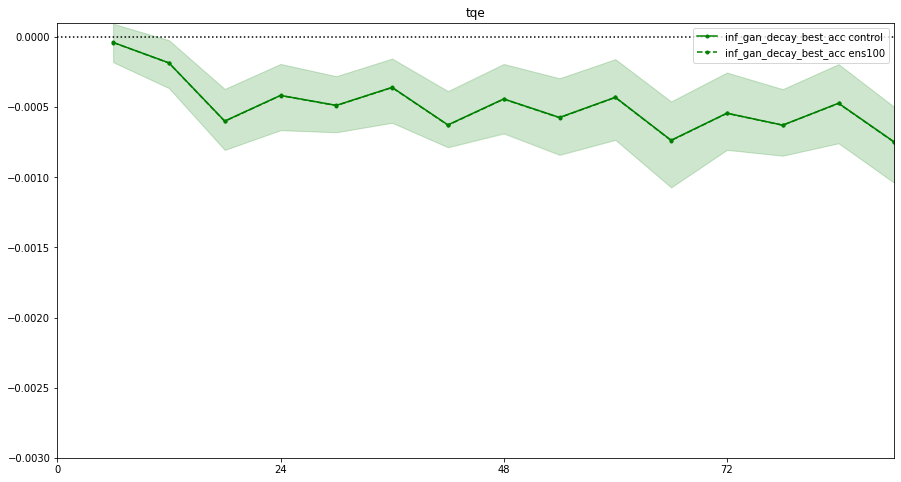

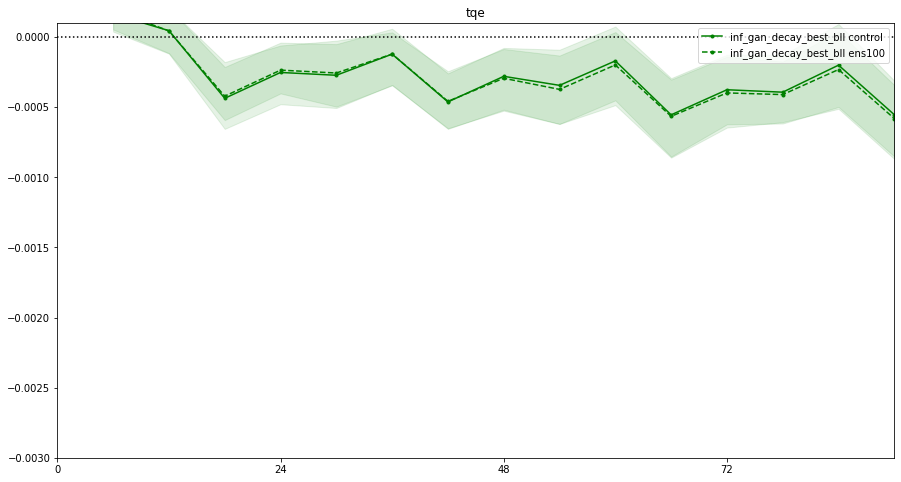

In [26]:
for key in keys:
    f = viz_inference({key: inf_results[key]}, ['control', 'ens100'], metric_name='tqe')
    plt.hlines(0, 0, 15 * 6, colors='k', linestyles='dotted')
    plt.ylim(-0.003, 0.0001)
    f.show()

# Outputs

## Gaussian blur experiment

In [27]:
gan_f = h5py.File(os.path.join(cfs_dir, 'inf_gan_decay/inference_ensemble/control/ens_autoregressive_predictions_control_tp_ckpt_best_binned_log_l1.h5'), 'r')
gan_blur_f = h5py.File('/pscratch/sd/j/jpduncan/weatherbenching/ERA5_generative/inference/inf_gan_decay/inference_gauss_blur/best_dll/combined/gauss_blur.h5', 'r')
gan_blur_f.keys()

<KeysViewHDF5 ['acc', 'ics', 'rmse', 'sigmas', 'tqe']>

In [28]:
# ics, n_sigmas, n_dt, w, h
gan_blur_f['acc'].shape

(178, 10, 41)

In [29]:
gan_f['acc'].shape

(178, 41, 1)

In [30]:
sigmas = np.unique(gan_blur_f['sigmas'][:])

In [31]:
ifs_f = h5py.File('/global/cfs/cdirs/m4134/pscratch/precip/tigge/total_precipitation/2018.h5', 'r')
ifs_f['tp'].shape

(730, 20, 720, 1440)

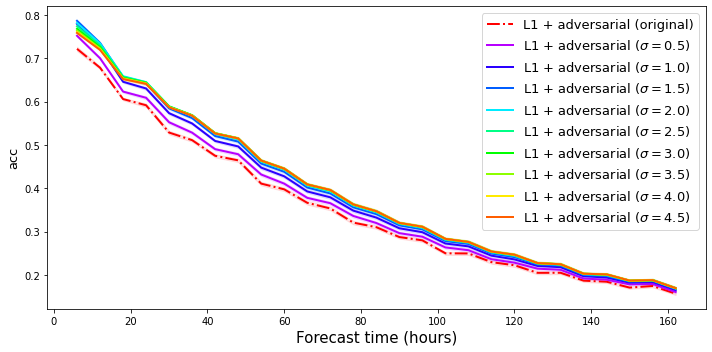

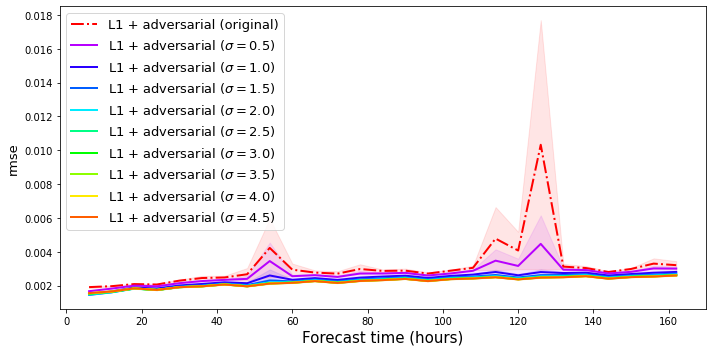

/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


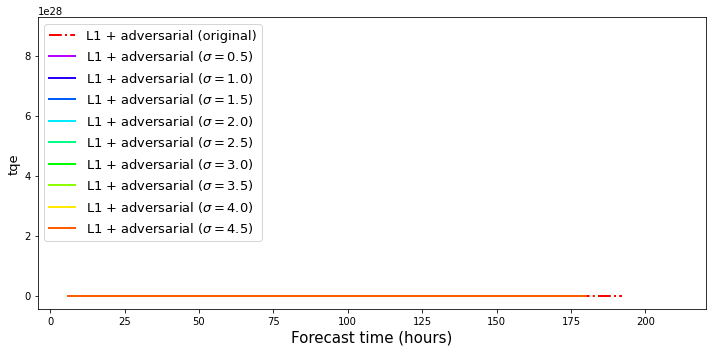

In [32]:
fcstep = 3

vmin, vmax = 0., 5.
cmap = gist_rainbow.reversed()
norm = Normalize(vmin=vmin, vmax=vmax)

for metric in ['acc', 'rmse', 'tqe']:

    t = (np.arange(gan_blur_f[metric].shape[-1]-1) + 1) *6
    
    baseline_mean = np.mean(gan_f[metric][:, 1:, 0], axis=0)
    baseline_stderr = np.std(gan_f[metric][:, 1:, 0], axis=0) / np.sqrt(gan_f[metric].shape[0])
    
    fs=15

    plt.figure(figsize=(10,5))
    ax = plt.gca()

    ax.plot(t, baseline_mean, 'r-.', label=r'L1 + adversarial (original)', lw=2)
    ax.fill_between(t, baseline_mean+baseline_stderr, baseline_mean-baseline_stderr, alpha=0.1, color='r')
    
    for i in range(1, gan_blur_f[metric].shape[1]):
        
        sigma = sigmas[i]
    
        metric_mean = np.mean(gan_blur_f[metric][:, i, 1:], axis=0)
        metric_stderr = np.std(gan_blur_f[metric][:, i, 1:], axis=0) / np.sqrt(gan_blur_f[metric].shape[0])

        ax.plot(t, metric_mean, linestyle='-', label=f'L1 + adversarial ($\sigma = {sigmas[i]}$)', lw=2, color=cmap(norm(sigma)))
        ax.fill_between(t, metric_mean+metric_stderr, metric_mean-metric_stderr, alpha=0.1, color=cmap(norm(sigma)))

    ax.set_xlabel('Forecast time (hours)', fontsize=fs)
    ax.set_ylabel(metric, fontsize=fs-2)
    ax.legend(fontsize=fs-2)
    plt.tight_layout()
    # plt.savefig(outdir+'gaussblur_acc.pdf')

    plt.show()